## Kaggle data set with historical housing prices for King County, USA
EDA and creating/training neural network to predict prices based on various features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('dark')

In [2]:
df = pd.read_csv('C:/Users/SolveigFrank/Desktop/Python/TensorFlow_FILES/TensorFlow_FILES/DATA/kc_house_data.csv')

In [3]:
#no null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.drop(['id'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


C:\Users\SolveigFrank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

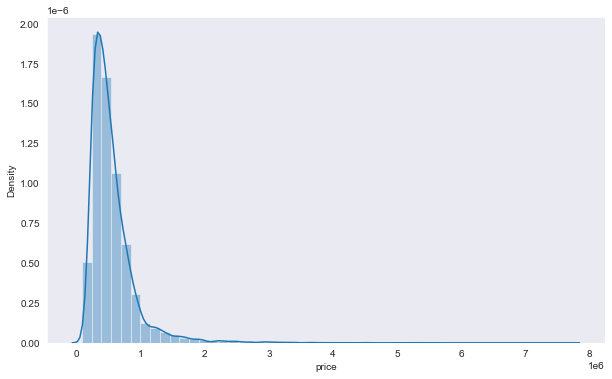

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\Users\SolveigFrank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

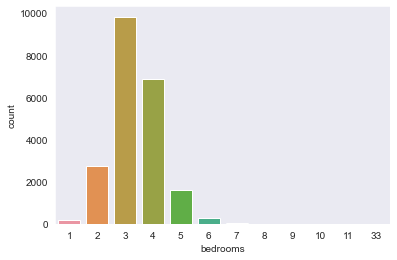

In [11]:
sns.countplot(df['bedrooms'])

In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

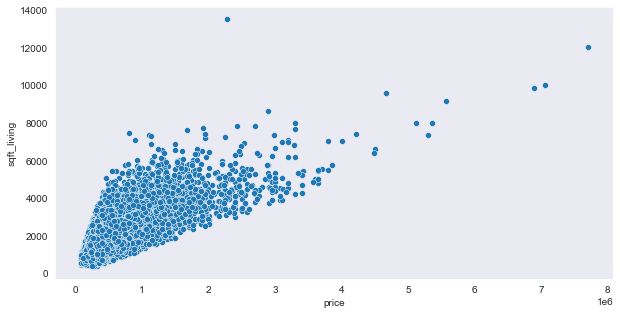

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

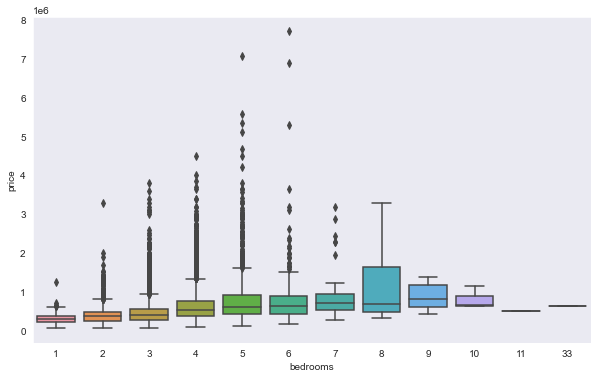

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

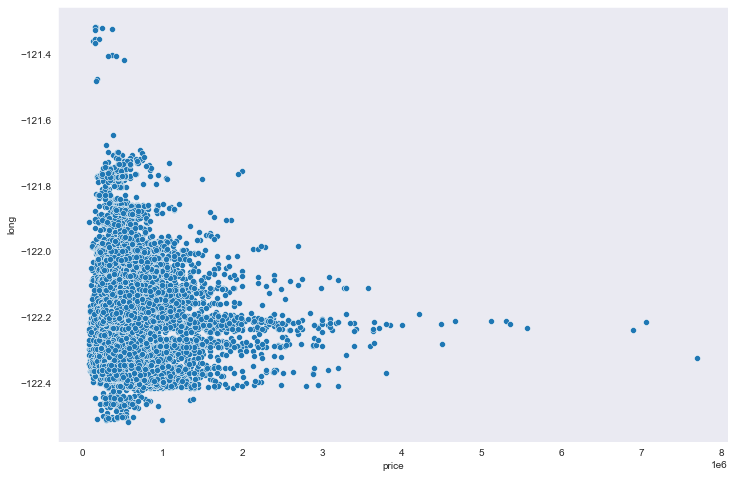

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

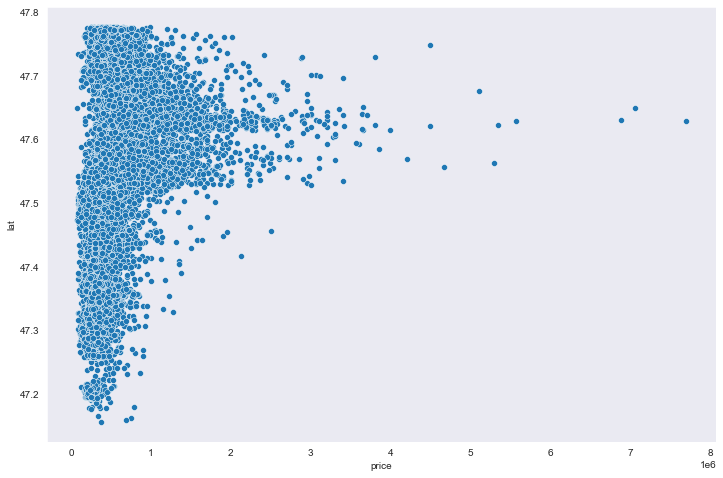

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

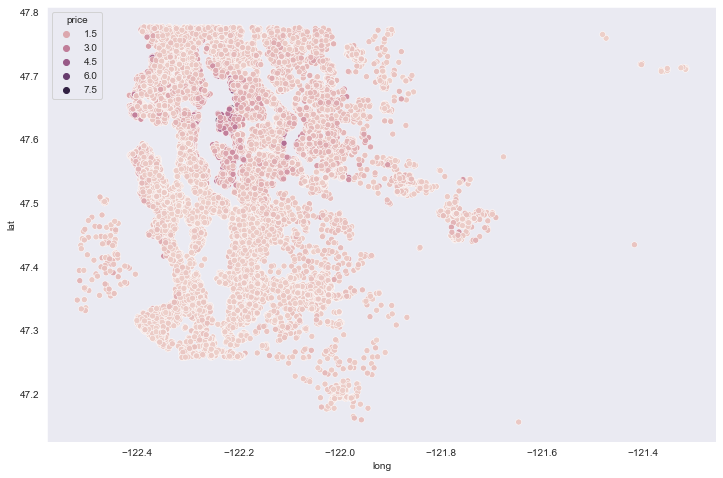

In [22]:
#Creating a map based on long and lat - looks very similar to a real world map of King County
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [23]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [25]:
len(df)*0.01

215.97

In [26]:
non_top_1_pct = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

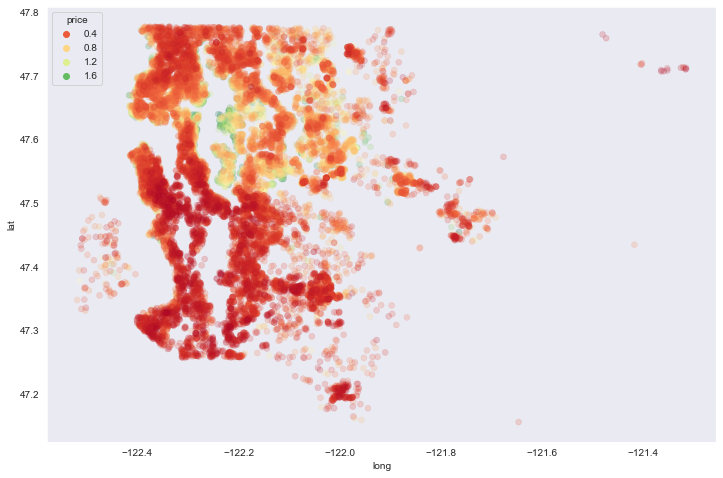

In [32]:
#Mapped prices without top 1% expensive houses
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_pct,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

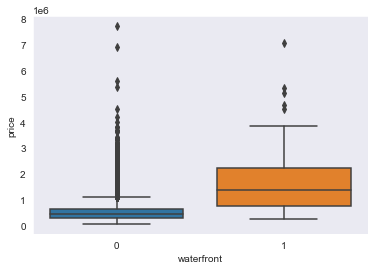

In [33]:
sns.boxplot(x='waterfront',y='price',data=df)

In [34]:
#Feature engineering
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
df = df.drop('id',axis=1)

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [39]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [40]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

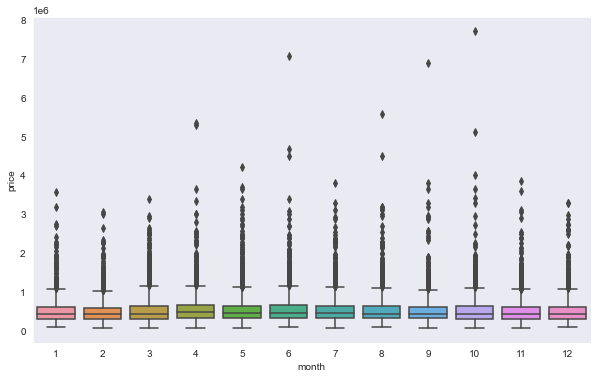

In [41]:
#looking at months
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [42]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

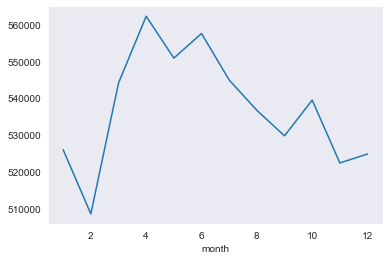

In [43]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

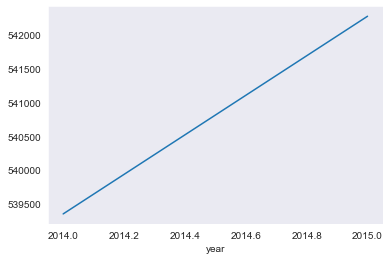

In [44]:
df.groupby('year').mean()['price'].plot()

In [45]:
df = df.drop('date',axis=1)

In [46]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [47]:
#Looking at zipcode
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [48]:
#Too many categories - without particular domain knowledge 
#of zipcodes in this area
df = df.drop('zipcode',axis=1)

In [49]:
#Correlation between year and renovation - can keep it in
df['yr_renovated'].value_countsounts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [50]:
#Can also be kept continuous
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [51]:
#Train data

In [52]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
X_train.shape

(15117, 19)

In [62]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [63]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 430242856960.0000 - val_loss: 418932228096.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 429462519808.0000 - val_loss: 416194002944.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 417908326400.0000 - val_loss: 389167448064.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 357514412032.0000 - val_loss: 288136036352.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 220340944896.0000 - val_loss: 140295438336.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 114092597248.0000 - val_loss: 96104079360.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 98157305856.0000 - val_loss: 94206853120.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 96579461120.0000 - val_loss: 92810067968.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 33118545920.0000 - val_loss: 31630096384.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33077022720.0000 - val_loss: 31594670080.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 33035487232.0000 - val_loss: 31640956928.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33028857856.0000 - val_loss: 31554756608.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33029167104.0000 - val_loss: 31598161920.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32978823168.0000 - val_loss: 31499448320.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32952076288.0000 - val_loss: 31442698240.0000
Epoch 142/400
119/119 [==============================] - 0s 4ms/step - loss: 32903294976.0000 - val_loss: 31395043328.0000
Epoch 143/400
11

119/119 [==============================] - 0s 4ms/step - loss: 30731126784.0000 - val_loss: 28805943296.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 30710034432.0000 - val_loss: 28788131840.0000
Epoch 269/400
119/119 [==============================] - 0s 4ms/step - loss: 30736453632.0000 - val_loss: 28886943744.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 30711130112.0000 - val_loss: 28783620096.0000
Epoch 271/400
119/119 [==============================] - 0s 4ms/step - loss: 30674743296.0000 - val_loss: 28754327552.0000
Epoch 272/400
119/119 [==============================] - 0s 4ms/step - loss: 30659960832.0000 - val_loss: 28740501504.0000
Epoch 273/400
119/119 [==============================] - 0s 4ms/step - loss: 30675523584.0000 - val_loss: 28703903744.0000
Epoch 274/400
119/119 [==============================] - 0s 4ms/step - loss: 30647353344.0000 - val_loss: 28895762432.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29452843008.0000 - val_loss: 27163889664.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29452310528.0000 - val_loss: 27202168832.0000


In [65]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

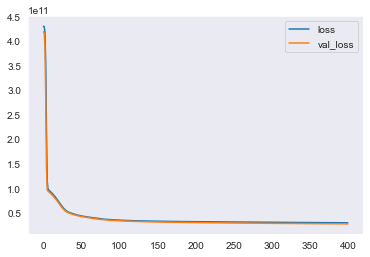

In [66]:
#Doesn't seem to be any overfitting
losses.plot()

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [68]:
predictions = model.predict(X_test)

In [70]:
#RMSE
mean_squared_error(y_test,predictions)**0.5

164930.7948595416

In [71]:
mean_absolute_error(y_test,predictions)

102288.55064621914

In [72]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [77]:
#only around 80% of variance explained by model
explained_variance_score(y_test,predictions)

0.7950734244506822

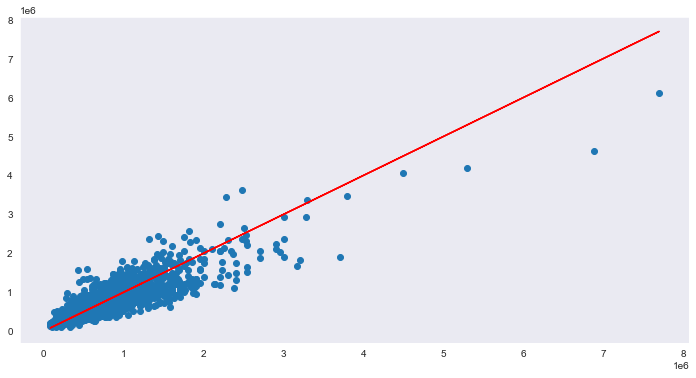

In [78]:
#potentially explained by outliers (over 99%)
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [79]:
single_house = df.drop('price',axis=1).iloc[0]

In [81]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [82]:
model.predict(single_house)

array([[284312.53]], dtype=float32)

In [83]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [1]:
#Overshot price by 60k - by dropping the top 1 or 2 percent 
#of the most expensive houses we probably could get a better model.
#Could probably also be improved with more feature engineering.